In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\dataset\dataset.csv")
df.head()

Matplotlib is building the font cache; this may take a moment.


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [2]:
df["SentimentText"][0].split()

['is', 'so', 'sad', 'for', 'my', 'APL', 'friend.............']

In [3]:
X = df["SentimentText"]
y = df["Sentiment"]

In [4]:
y.value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

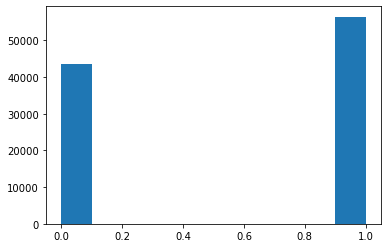

In [13]:
plt.hist(y);

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.3, random_state=24)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with CountVectorizer")
print(lr_score)
#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_dtm)
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print(tpr_lr, tnr_lr)

Results for Logistic Regression with CountVectorizer
0.7626429309597627
8982 4133 2987 13895
0.8231 0.6849


In [9]:
print(y_pred_lr)

[1 0 1 ... 1 1 1]


In [10]:
dff = pd.DataFrame({"Y_Test":y_test,"Prediction":y_pred_lr})
print(dff)

       Y_Test  Prediction
95270       1           1
65941       1           0
53965       1           1
19806       0           0
87105       0           1
...       ...         ...
33835       1           1
76005       1           0
74628       1           1
24233       1           1
55912       1           1

[29997 rows x 2 columns]
